In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

file = open('gamma0.pickle', 'rb')
solutions = pickle.load(file)
file.close()

In [3]:
#Dispersion relation
R_dim = 30e3
R_nondim = R_dim/300e3
beta_dim = 2e-12
beta_nondim = beta_dim * 86400 * 300e3

#Fourier harmonics
S = 10 #spectral radius
N = 41

def omega(k,l):
    return -beta_nondim * k / (k**2 + l**2 + R_nondim**-2)

P = 5 #radius of peak
H = 0.008 #height of peak (max amplitude)

def A(k,l):
  return H * np.exp(-0.5*(k**2+l**2-P**2)**2/(2*P**2))

k,l = np.linspace(-S,S,N),np.linspace(-S,S,N)
K,L = np.meshgrid(k,l)
phi = np.random.uniform(0,2*np.pi,size=(N,N))
omega_vals = omega(K,L)

def modulo_grid(x, y):
  x_mod = np.mod(x + np.pi, 2 * np.pi) - np.pi
  y_mod = np.mod(y + np.pi, 2 * np.pi) - np.pi
  return x_mod, y_mod

def f(t,pos):
  x_mod,y_mod = modulo_grid(*pos)
  t = 30
  dx = -np.real(np.sum(1j*K*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  dy = np.real(np.sum(1j*L*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  return [dx,dy]

[0.009982787165493225, 0.009342107337793979, 0.015480056531466332, 0.011465133103324355, 0.015189135654494855, 0.014470384688328062, 0.01950463408354664, 0.015398024761400942, 0.01694609409748056, 0.019123419384634962, 0.023265798105738544, 0.020939071161794387, 0.010388185165709551, 0.004497453966985472, 0.013545729654977343, 0.021670660746278925, 0.01086465208637404, 0.022023410433159137, 0.023130874545495596, 0.015245559615031245, 0.013062551803984183, 0.02230273461375356, 0.016532401448252892, 0.02086729176089215, 0.012194555752961259, 0.014354432906255248, 0.022193710369548973, 0.008427202068584307, 0.00661995954701439, 0.01938985989476291, 0.009557941501311491, 0.0014626306247239533, 0.015942969566078723, 0.015865478079151736, 0.012684861905227593, 0.005257337013034937, 0.014501978369460013, 0.015664134331410905, 0.01383749105744153, 0.013068655624293164, 0.01845815309886235, 0.02028020277433597, 0.012466524011509371, 0.012545538782072433, 0.01343826230245552, 0.01915240416268205

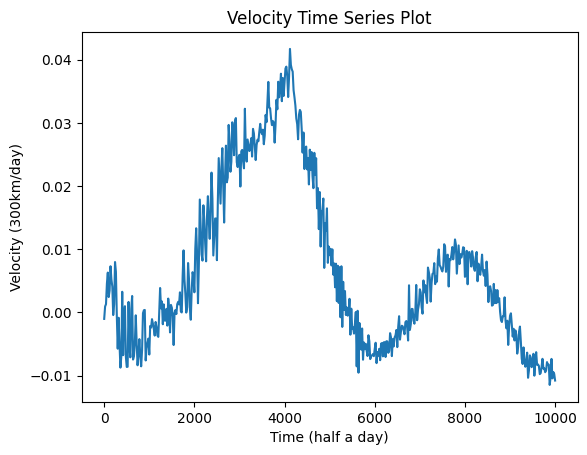

In [4]:
#all velocities in one list
initial_time = 0
time_steps_list =  range(0,10001, 20)
x_vel_list=[]
y_vel_list=[]

for time in time_steps_list:
    x_vel_sum = 0
    y_vel_sum = 0
    for sol in solutions:


        x = sol[:,0] #extrapolate coordinates for position to feed into function f 
        y = sol[:,1]
        
        new_x = x[time] #finds new indices
        new_y = x[time]
        
        vel = f(time, [new_x, new_y]) #computes x velocity at specific time and position        
        x_vel = vel[0]
        x_vel_sum += x_vel
        y_vel = vel[1]
        y_vel_sum += y_vel

    x_vel_list.append(x_vel_sum/500)
    y_vel_list.append(y_vel_sum/500)
        
print(x_vel_list)
print(y_vel_list)

fig, ax = plt.subplots()
ax.plot(time_steps_list, y_vel_list)
plt.xlabel('Time (half a day)')
plt.ylabel('Velocity (300km/day)')
plt.title('Velocity Time Series Plot')
plt.show()

-0.07570202098950864
0.01852291553851644
-0.0028880974022062232
-0.004972711707057705
0.007146681564584396
0.00041771353571499293
0.01039379552553851
-0.0045473792061325805
0.0004624837215060061
0.002701754836487804
-0.0008484820507351936
0.003788104474173978
-0.0020586344598431685
0.00410290758368797
0.0025948689319209837
0.002004162223411744
-0.0009406427486976979
0.00043746706850130335
0.00014694327065615807
0.0005079349102906574
-6.818848857475335e-05
-0.0010337715566604106
0.002943663375657252
0.0020922381122872526
-0.0005837474262665515
0.00030269056582550645
0.0004765987173820603
0.00040912030727234257
0.0010113257237290571
0.0015634978332120307
-0.0006731428850352192
0.0013953536385338742
-0.00011940859414228312
-0.0017256299746161619
-0.0011312594953973496
-0.0011548341721520404
-0.0005063741035806496
-0.002056925026179309
-0.0009525851659027415
-0.0003284807541517942
-0.0007620536170700879
-1.2979436849272172e-05
-0.0006588480542810304
0.0006567106927882508
-0.000344578511777

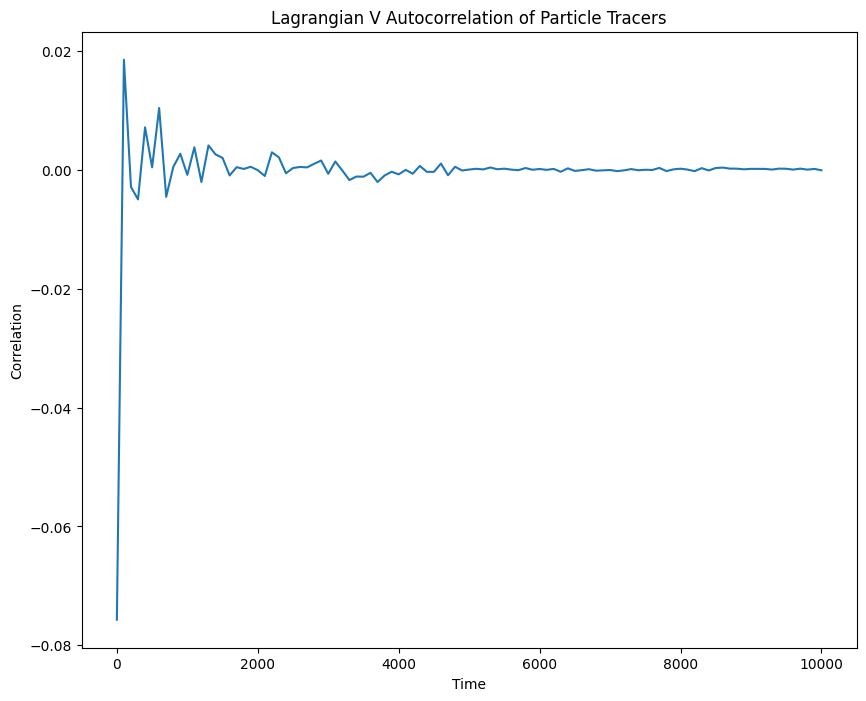

In [5]:
#sus version

vaf_list=[] #empty velocity autocorrelations list
n = 10001
time_steps_list= range(0,10001, 100)

x_sq = 0
y_sq = 0

for time in time_steps_list:
    
    dot_prod = 0 #initialise dot product for each different time
    
    for sol in solutions:

        x = sol[:,0] #extrapolate coordinates for position to feed into function f 
        y = sol[:,1]
        
        initial_time = 0
        initial_x = x[0]
        initial_y = y[0]
        initial_x_vel = f(initial_time, [initial_x, initial_y])[0]
        initial_y_vel = f(initial_time, [initial_x, initial_y])[1]
        
        new_x = x[time]
        new_y = x[time]
        
        vel = f(time, [new_x, new_y]) #computes x velocity at specific time and position        
        x_vel = vel[0]
        y_vel = vel[1]
        
        x_sq += x_vel**2
        y_sq += y_vel**2
        speed_sq = x_sq + y_sq

        dot_prod += initial_y_vel * y_vel 
        
    vaf_list.append(dot_prod/speed_sq) 

for vaf in vaf_list:
    print(vaf)

fig, ax = plt.subplots()
ax.plot(time_steps_list, vaf_list)
fig.set_size_inches(10, 8)
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.title('Lagrangian V Autocorrelation of Particle Tracers')
plt.show()




[1.0, 0.9617193786794376, 0.950340805257371, 0.9503039144820554, 0.9588191399668663, 0.9418927504805674, 0.9312068754926466, 0.9327324833743851, 0.9337972320963356, 0.9232764576074475, 0.9132363262448555, 0.9049505309125118, 0.9022026541634847, 0.8918225332624418, 0.8833337411506221, 0.8704125708178891, 0.8651297874371212, 0.854111147946761, 0.847685512940274, 0.8306574537926887, 0.8219036849307583, 0.8087248992703527, 0.8021030200603972, 0.7871412656542618, 0.7768526335018701, 0.7634261809982382, 0.7526075237540052, 0.7388282913962655, 0.7245419816490606, 0.7085779388197562, 0.6943775535516659, 0.6811068421232419, 0.667052736022332, 0.6485813855999816, 0.6316730813175249, 0.6214356143297679, 0.608793677902964, 0.5912089684105092, 0.571951684707365, 0.5602498511704661, 0.5443923628242313, 0.5265256961837522, 0.5094626189994178, 0.4923100979248608, 0.4815265265167747, 0.4624860425704333, 0.44501201201568313, 0.4275012103220772, 0.41508665490094193, 0.3982793029439782, 0.3810305855523071

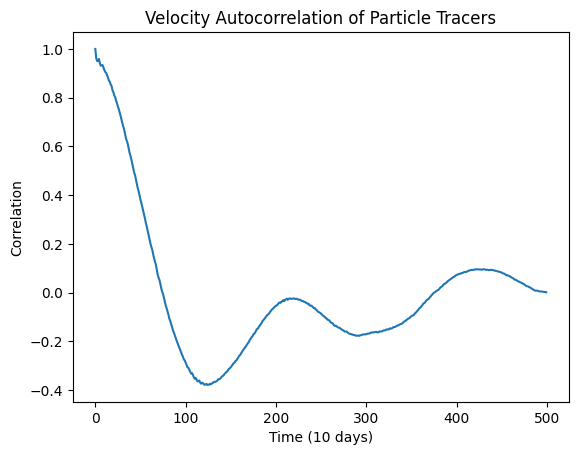

In [6]:
#more correct method of autocorrelation

y_series_mean = np.mean(y_vel_list)
n = 500
steps_list= range(0, 500)
acf_lag_list=[]

#working out s0
s0 = 0
k = 0
for i in range(1, n+1):
    s0 += (1/n)*(y_vel_list[i] - y_series_mean)*(y_vel_list[i+k] - y_series_mean)

for k in steps_list:
    acf_lag = 0
    for i in range(1, n-k+1):

        acf_lag += (1/n)*(y_vel_list[i] - y_series_mean)*(y_vel_list[i+k] - y_series_mean)

    acf_lag_list.append(acf_lag/s0)
    
print(acf_lag_list)
plt.plot(steps_list, acf_lag_list)
plt.xlabel('Time (10 days)')
plt.ylabel('Correlation')
plt.title('Velocity Autocorrelation of Particle Tracers')
plt.show()